# LIBRARIES


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# INISIASI DATASET


In [3]:
# import
SENTIMENT_DATASET_FILE_NAME = "eng-sentiment.csv"
SENTIMENT_DATASET_FILE_PATH = f"outputs/{SENTIMENT_DATASET_FILE_NAME}"
DATA_FRAME_SENTIMENT_DATASET = pd.read_csv(SENTIMENT_DATASET_FILE_PATH)
DATA_FRAME_SENTIMENT_DATASET_LENGTH = len(DATA_FRAME_SENTIMENT_DATASET)
print(f"sentiment dataset: {DATA_FRAME_SENTIMENT_DATASET_LENGTH} tweets")
display(DATA_FRAME_SENTIMENT_DATASET.tail(1))

sentiment dataset: 4042 tweets


,user_id,username,user_display_name,tweet_id,full_text,created_at,cleaned_text,after_slang_text,translated_text,after_stopwords_text,after_lemmatized_text,eng_preprocessed_text,compound_score,label
4041,1685924328851038208,maulani_salsa76,Maulani Salsa,1822028454411563237,@aminun40 Dukung pemindahan Ibu Kota Nusantara...,Fri Aug 09 21:53:29 +0000 2024,dukung pemindahan ibu kota nusantara untuk men...,dukung pemindahan ibu kota nusantara untuk men...,support the relocation of the indonesian capit...,support relocation indonesian capital optimize...,support relocation indonesian capital optimize...,support relocation indonesian capital optimize...,0.8126,positif


# DATA SPLIT (80% TRAIN, 20% TEST)


'random_state=0' menyatakan tidak ada pengacakan pada data yang di split yang artinya urutannya masih sama.


In [4]:
sentiment = DATA_FRAME_SENTIMENT_DATASET

# data split
train_X, test_X, train_Y, test_Y = train_test_split(sentiment["eng_preprocessed_text"], sentiment["label"], test_size=0.2, random_state=0)

# train and test dataframes
df_train80 = pd.DataFrame()
df_train80["text"] = train_X
df_train80["label"] = train_Y

df_test20 = pd.DataFrame()
df_test20["text"] = test_X
df_test20["label"] = test_Y

# export dataframes
df_train80.to_csv("outputs/train_test/eng_train80.csv")
df_test20.to_csv("outputs/train_test/eng_test20.csv")

# TF-IDF


In [6]:
# inisiasi vectorizer
tfidf_vect_8020 = TfidfVectorizer(max_features=5000)
tfidf_vect_8020.fit(sentiment["eng_preprocessed_text"])

# ?????
train_X_tfidf_8020 = tfidf_vect_8020.transform(df_train80["text"])
test_X_tfidf_8020 = tfidf_vect_8020.transform(df_test20["text"])

# KNN


In [7]:
# train and test k=1
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(train_X_tfidf_8020, train_Y)
pred1 = knn1.predict(test_X_tfidf_8020)
test_pred_8020_k1 = pd.DataFrame()
test_pred_8020_k1["text"] = test_X
test_pred_8020_k1["label"] = pred1
k1_accuracy_8020_linier = accuracy_score(pred1, test_Y) * 100
k1_accuracy_8020_linier = round(k1_accuracy_8020_linier, 1)
k1_accuracy_8020_linier

77.1

In [8]:
# train and test k=3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(train_X_tfidf_8020, train_Y)
pred3 = knn3.predict(test_X_tfidf_8020)
test_pred_8020_k3 = pd.DataFrame()
test_pred_8020_k3["text"] = test_X
test_pred_8020_k3["label"] = pred3
k3_accuracy_8020_linier = accuracy_score(pred3, test_Y) * 100
k3_accuracy_8020_linier = round(k3_accuracy_8020_linier, 1)
k3_accuracy_8020_linier

74.7

In [9]:
# train and test k=5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(train_X_tfidf_8020, train_Y)
pred5 = knn5.predict(test_X_tfidf_8020)
test_pred_8020_k5 = pd.DataFrame()
test_pred_8020_k5["text"] = test_X
test_pred_8020_k5["label"] = pred5
k5_accuracy_8020_linier = accuracy_score(pred5, test_Y) * 100
k5_accuracy_8020_linier = round(k5_accuracy_8020_linier, 1)
k5_accuracy_8020_linier

74.4

In [10]:
# train and test k=7
knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(train_X_tfidf_8020, train_Y)
pred7 = knn7.predict(test_X_tfidf_8020)
test_pred_8020_k7 = pd.DataFrame()
test_pred_8020_k7["text"] = test_X
test_pred_8020_k7["label"] = pred7
k7_accuracy_8020_linier = accuracy_score(pred7, test_Y) * 100
k7_accuracy_8020_linier = round(k7_accuracy_8020_linier, 1)
k7_accuracy_8020_linier

72.3

In [11]:
# CLASSIFICATION REPORT: Accuracy, Precision, Recall, f1-score
print("\nHere is the classification report:") 
print(" ")
print("K1 "+classification_report(test_Y, pred1))
print("K3 "+classification_report(test_Y, pred3))
print("K5 "+classification_report(test_Y, pred5))
print("K7 "+classification_report(test_Y, pred7))


Here is the classification report:
 
K1               precision    recall  f1-score   support

     negatif       0.60      0.32      0.42        84
      netral       0.66      0.81      0.73       228
     positif       0.85      0.83      0.84       497

    accuracy                           0.77       809
   macro avg       0.70      0.65      0.66       809
weighted avg       0.77      0.77      0.76       809

K3               precision    recall  f1-score   support

     negatif       0.47      0.36      0.41        84
      netral       0.64      0.75      0.69       228
     positif       0.84      0.81      0.83       497

    accuracy                           0.75       809
   macro avg       0.65      0.64      0.64       809
weighted avg       0.75      0.75      0.74       809

K5               precision    recall  f1-score   support

     negatif       0.62      0.27      0.38        84
      netral       0.61      0.78      0.68       228
     positif       0.84     

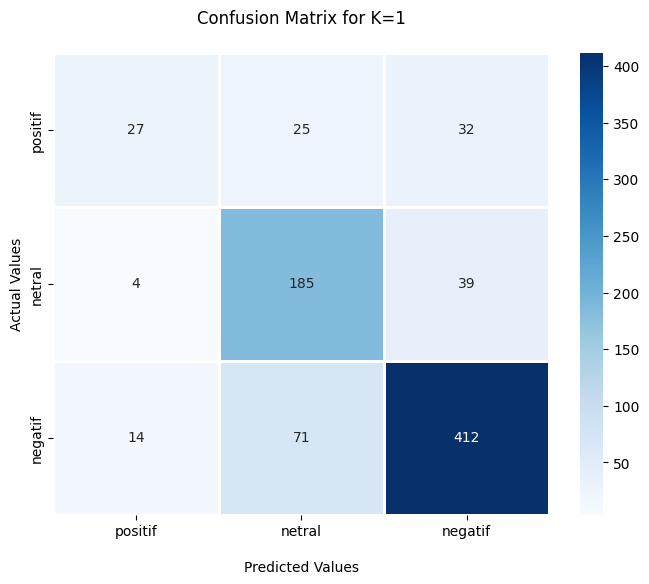

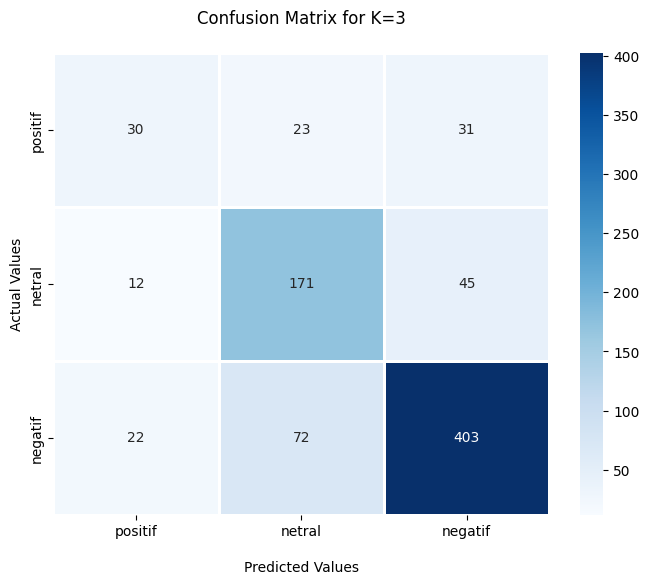

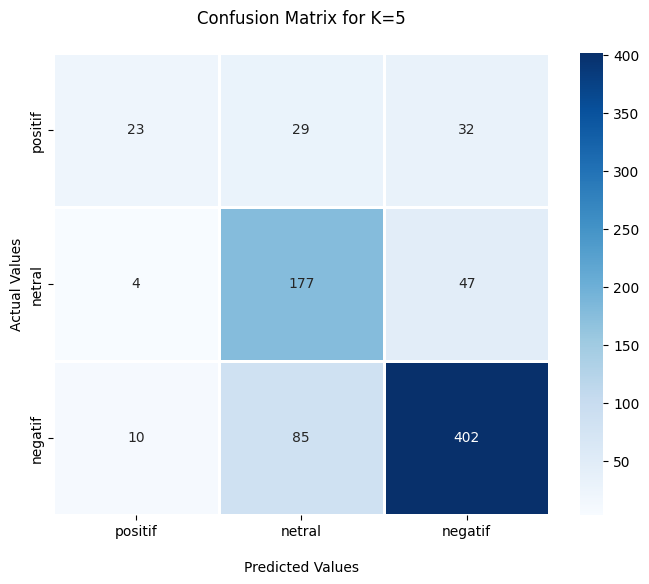

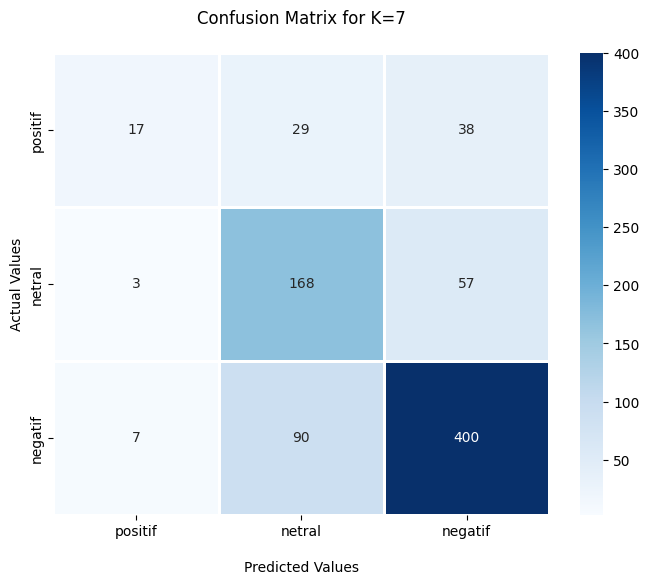

In [12]:
# CONFUSION MATRIX K1-K7
k1_cm = confusion_matrix(test_Y, pred1)
plt.figure(figsize = (8, 6))
k1_ax = sns.heatmap(k1_cm, cmap = 'Blues',
                    linecolor = 'white',
                    linewidth = 1,
                    annot = True,
                    fmt = '',
                    xticklabels = ['positif','netral', 'negatif'],
                    yticklabels = ['positif','netral', 'negatif'])
k1_ax.set_title("Confusion Matrix for K=1\n")
k1_ax.set_xlabel("\nPredicted Values")
k1_ax.set_ylabel("Actual Values")
plt.show()

k3_cm = confusion_matrix(test_Y, pred3)
plt.figure(figsize = (8, 6))
k3_ax = sns.heatmap(k3_cm, cmap = 'Blues',
                    linecolor = 'white',
                    linewidth = 1,
                    annot = True,
                    fmt = '',
                    xticklabels = ['positif','netral', 'negatif'],
                    yticklabels = ['positif','netral', 'negatif'])
k3_ax.set_title("Confusion Matrix for K=3\n")
k3_ax.set_xlabel("\nPredicted Values")
k3_ax.set_ylabel("Actual Values")
plt.show()

k5_cm = confusion_matrix(test_Y, pred5)
plt.figure(figsize = (8, 6))
k5_ax = sns.heatmap(k5_cm, cmap = 'Blues',
                    linecolor = 'white',
                    linewidth = 1,
                    annot = True,
                    fmt = '',
                    xticklabels = ['positif','netral', 'negatif'],
                    yticklabels = ['positif','netral', 'negatif'])
k5_ax.set_title("Confusion Matrix for K=5\n")
k5_ax.set_xlabel("\nPredicted Values")
k5_ax.set_ylabel("Actual Values")
plt.show()

k7_cm = confusion_matrix(test_Y, pred7)
plt.figure(figsize = (8, 6))
k7_ax = sns.heatmap(k7_cm, cmap = 'Blues',
                    linecolor = 'white',
                    linewidth = 1,
                    annot = True,
                    fmt = '',
                    xticklabels = ['positif','netral', 'negatif'],
                    yticklabels = ['positif','netral', 'negatif'])
k7_ax.set_title("Confusion Matrix for K=7\n")
k7_ax.set_xlabel("\nPredicted Values")
k7_ax.set_ylabel("Actual Values")
plt.show()

In [14]:
# SENTIMENT TEST PRED K1-K7
print(test_pred_8020_k1['label'].value_counts())
print(test_pred_8020_k3['label'].value_counts())
print(test_pred_8020_k5['label'].value_counts())
print(test_pred_8020_k7['label'].value_counts())

label
positif    483
netral     281
negatif     45
Name: count, dtype: int64
label
positif    479
netral     266
negatif     64
Name: count, dtype: int64
label
positif    481
netral     291
negatif     37
Name: count, dtype: int64
label
positif    495
netral     287
negatif     27
Name: count, dtype: int64


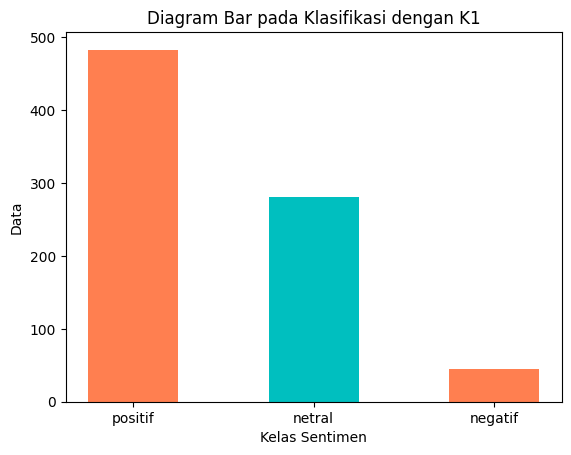

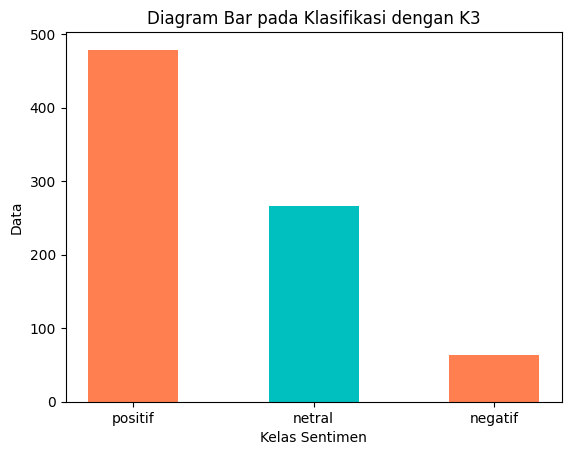

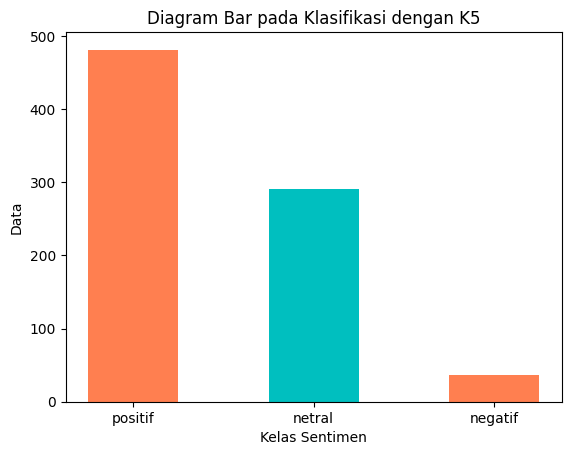

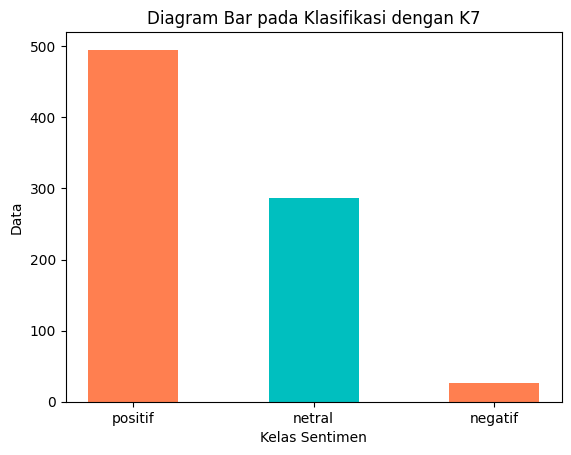

In [15]:
# DIAGRAM BAR PADA KLASIFIKASI DENGAN KNN K1-K7
labels = ['positif','netral', 'negatif']
k1_counts= test_pred_8020_k1['label'].value_counts()
plt.bar(labels, k1_counts, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar pada Klasifikasi dengan K1')
plt.show()

labels = ['positif','netral', 'negatif']
k3_counts= test_pred_8020_k3['label'].value_counts()
plt.bar(labels, k3_counts, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar pada Klasifikasi dengan K3')
plt.show()

labels = ['positif','netral', 'negatif']
k5_counts= test_pred_8020_k5['label'].value_counts()
plt.bar(labels, k5_counts, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar pada Klasifikasi dengan K5')
plt.show()

labels = ['positif','netral', 'negatif']
k7_counts= test_pred_8020_k7['label'].value_counts()
plt.bar(labels, k7_counts, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar pada Klasifikasi dengan K7')
plt.show()

([<matplotlib.patches.Wedge at 0x155a6ea4da0>,
 [Text(-1.0327661819069631, -0.37867402011402057, 'positif'),
  Text(1.0667255944873655, 0.2685079255172496, 'netral'),
  Text(0.11512319917355743, 1.0939591624060039, 'negatif')],
 [Text(-0.563327008312889, -0.20654946551673847, '61.2%'),
  Text(0.5818503242658356, 0.1464588684639543, '35.5%'),
  Text(0.06279447227648587, 0.596704997676002, '3.3%')])

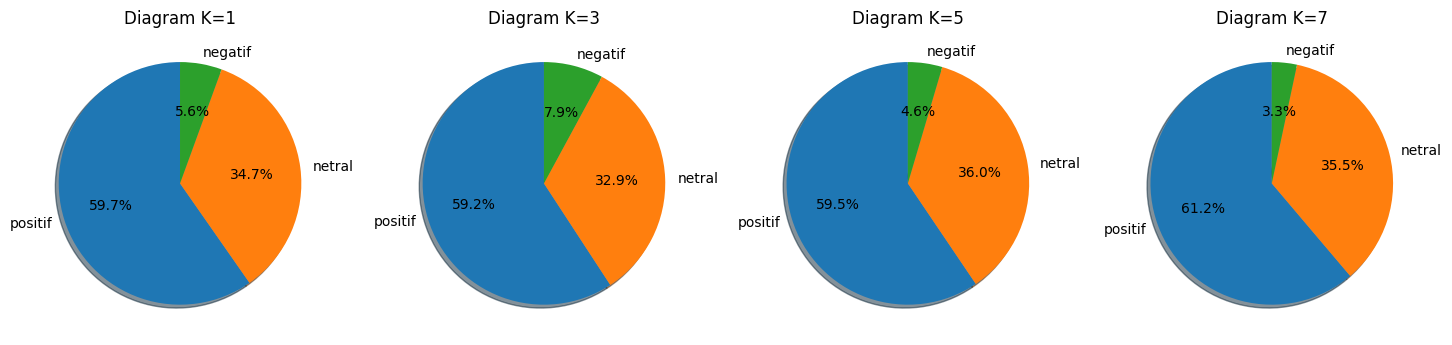

In [16]:
# PIE CHART PADA KLASIFIKASI DENGAN KNN K1-K7
plt.figure(figsize=(18,7))
plt.subplot(1,4,1)
plt.title('Diagram K=1')
plt.pie(k1_counts.values, labels = k1_counts.index,startangle=90, autopct='%1.1f%%', shadow=True)
plt.subplot(1,4,2)
plt.title('Diagram K=3')
plt.pie(k3_counts.values, labels = k3_counts.index,startangle=90, autopct='%1.1f%%', shadow=True)
plt.subplot(1,4,3)
plt.title('Diagram K=5')
plt.pie(k5_counts.values, labels = k5_counts.index,startangle=90, autopct='%1.1f%%', shadow=True)
plt.subplot(1,4,4)
plt.title('Diagram K=7')
plt.pie(k7_counts.values, labels = k7_counts.index,startangle=90, autopct='%1.1f%%', shadow=True)

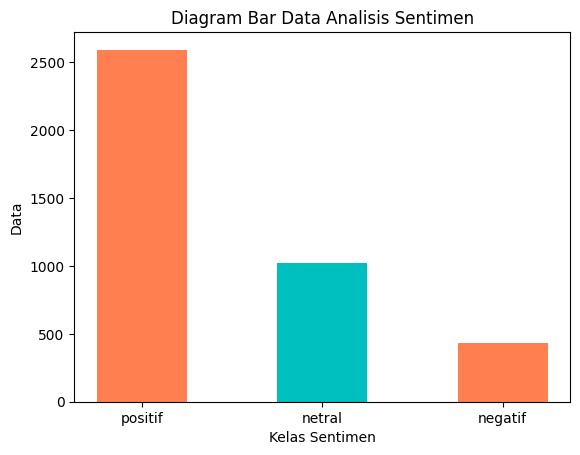

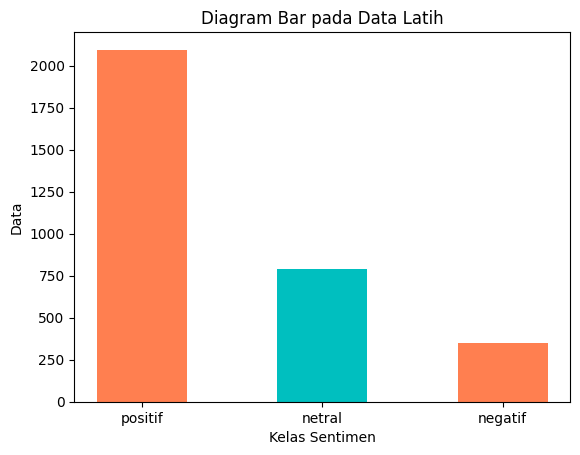

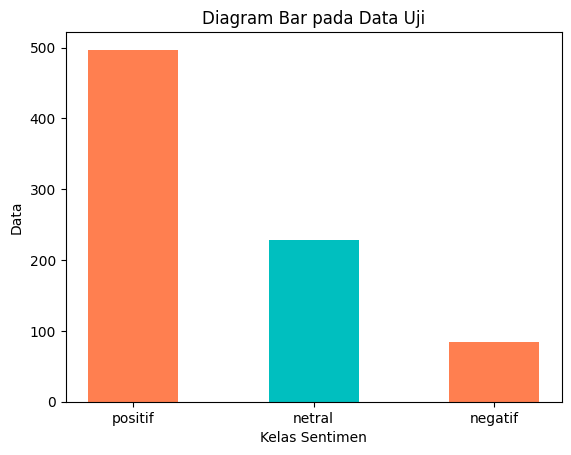

In [18]:
# DIAGRAM BAR ANALISIS SENTIMEN, DATA UJI, DATA LATIH
labels = ['positif','netral', 'negatif']
all_counts= sentiment['label'].value_counts()
plt.bar(labels, all_counts, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar Data Analisis Sentimen')
plt.show()

labels = ['positif','netral', 'negatif']
train_counts= df_train80['label'].value_counts()
plt.bar(labels, train_counts, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar pada Data Latih')
plt.show()

labels = ['positif','netral', 'negatif']
test_counts= df_test20['label'].value_counts()
plt.bar(labels, test_counts, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar pada Data Uji')
plt.show()

([<matplotlib.patches.Wedge at 0x155a6ed6990>,
 [Text(-1.0297940096344007, -0.3866837179415547, 'positif'),
  Text(1.0994008098606243, 0.03630233157530581, 'netral'),
  Text(0.3524876747674973, 1.041994452546175, 'negatif')],
 [Text(-0.5617058234369458, -0.21091839160448436, '61.4%'),
  Text(0.5996731690148859, 0.01980127176834862, '28.2%'),
  Text(0.19226600441863487, 0.5683606104797319, '10.4%')])

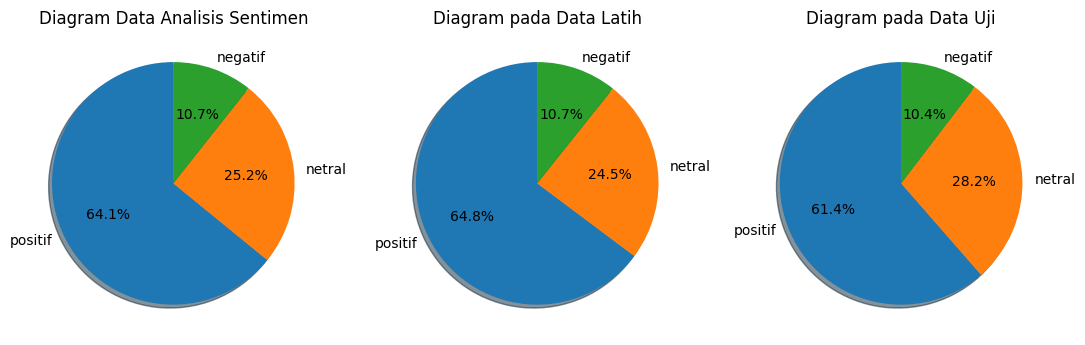

In [19]:
# PIE CHART ANALISIS SENTIMEN, DATA UJI, DATA LATIH
plt.figure(figsize=(18,7))
plt.subplot(1,4,1)
plt.title('Diagram Data Analisis Sentimen')
plt.pie(all_counts.values, labels = all_counts.index,startangle=90, autopct='%1.1f%%', shadow=True)
plt.subplot(1,4,2)
plt.title('Diagram pada Data Latih')
plt.pie(train_counts.values, labels = train_counts.index,startangle=90, autopct='%1.1f%%', shadow=True)
plt.subplot(1,4,3)
plt.title('Diagram pada Data Uji')
plt.pie(test_counts.values, labels = test_counts.index,startangle=90, autopct='%1.1f%%', shadow=True)

# DUMP KNN MODEL AND TF-IDF VECTORIZER


In [20]:
with open('models/eng_knn1_model.pkl', 'wb') as model_file:
    pickle.dump(knn1, model_file)
with open('models/eng_knn3_model.pkl', 'wb') as model_file:
    pickle.dump(knn3, model_file)
with open('models/eng_knn5_model.pkl', 'wb') as model_file:
    pickle.dump(knn5, model_file)
with open('models/eng_knn7_model.pkl', 'wb') as model_file:
    pickle.dump(knn7, model_file)

with open('models/eng_vectorizer_model.pkl', 'wb') as vec_file:
    pickle.dump(tfidf_vect_8020, vec_file)